In [1]:
#Bonus (Optional)
#As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that 
#your boss handed you spurious data in order to test the data engineering skills of a new employee. 
#To confirm your hunch, you decide to take the following steps to generate a visualization of the data, 
#with which you will confront your boss:

#Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, 
#but you are, after all, trying to prove your technical mettle.) 
#This step may require some research. Feel free to use the code below to get started. 
#Be sure to make any necessary modifications for your username, password, host, port, and database name:

#Consult SQLAlchemy documentation for more information.
#If using a password, do not upload your password to your GitHub repository. 
#See https://www.youtube.com/watch?v=2uaTPmNvH0I and 
#https://martin-thoma.com/configuration-files-in-python/ for more information.

#Create a histogram to visualize the most common salary ranges for employees.

#Create a bar chart of average salary by title.

In [1]:
#from sqlalchemy import *
#from sqlalchemy.ext.declarative import declarative_base
#from sqlalchemy.orm import relation, sessionmaker
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
import psycopg2
from config import password
from config import user

In [2]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://' + user+ ':' + password+ '@localhost:5432/ph_employee_db')
connection = engine.connect()

In [3]:
df =pd.read_sql_table("salaries",engine)
df

emp_no  salary  from_date    to_date
0        10001   60117 1986-06-26 1987-06-26
1        10002   65828 1996-08-03 1997-08-03
2        10003   40006 1995-12-03 1996-12-02
3        10004   40054 1986-12-01 1987-12-01
4        10005   78228 1989-09-12 1990-09-12
...        ...     ...        ...        ...
300019  499995   40000 1997-06-02 1998-06-02
300020  499996   58058 1996-05-13 1997-05-13
300021  499997   49597 1987-08-30 1988-08-29
300022  499998   40000 1993-12-27 1994-12-27
300023  499999   63707 1997-11-30 1998-11-30

[300024 rows x 4 columns]

In [4]:
x = df['salary']
x

0         60117
1         65828
2         40006
3         40054
4         78228
          ...  
300019    40000
300020    58058
300021    49597
300022    40000
300023    63707
Name: salary, Length: 300024, dtype: int64

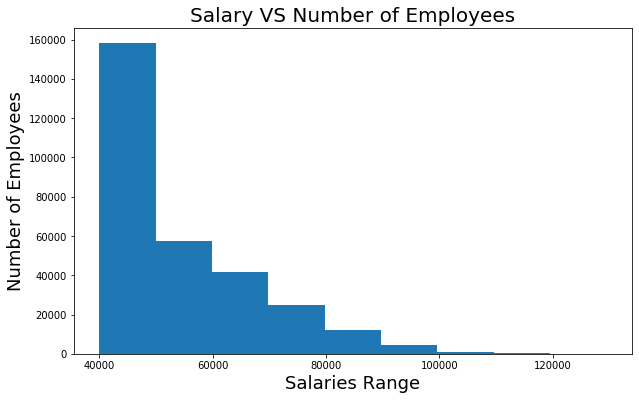

In [5]:
fig = plt.figure(figsize=(10,6))
plt.hist(x, bins = 9)
plt.title('Salary VS Number of Employees', fontsize = 20)
plt.xlabel('Salaries Range', fontsize = 18)
plt.ylabel('Number of Employees', fontsize = 18)
plt.show()
fig.savefig('Salary Vs employees')

In [6]:
query = '''SELECT ROUND(AVG(salaries.salary),0) AS average_salary, titles.title
FROM salaries
INNER JOIN titles ON
salaries.emp_no = titles.emp_no
GROUP BY titles.title
ORDER BY title;'''
avg_salary = pd.read_sql_query(query, engine)
avg_salary

average_salary               title
0         48493.0  Assistant Engineer
1         48540.0            Engineer
2         51531.0             Manager
3         48507.0     Senior Engineer
4         58503.0        Senior Staff
5         58465.0               Staff
6         48581.0    Technique Leader

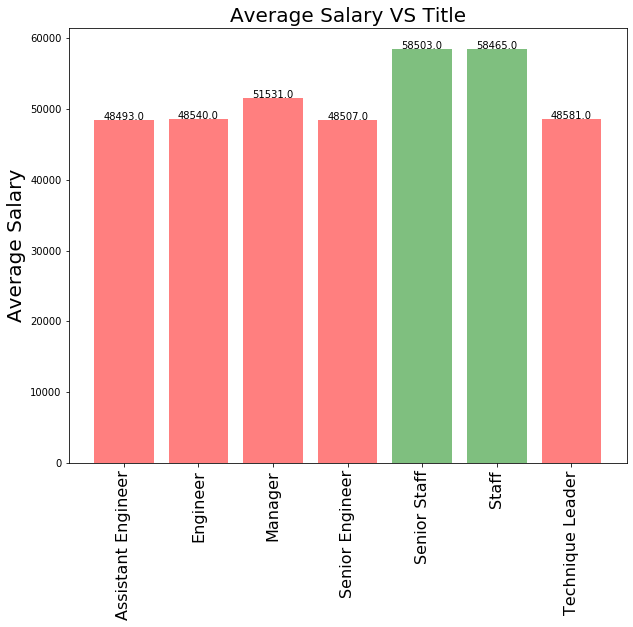

In [18]:
y = avg_salary['average_salary']
x = avg_salary['title']

fig = plt.figure(figsize=(10,8))
ax =fig.add_subplot()

for x_, y_ in zip(x, y):
    #plot the color based on the result of the evaluation
    ax.bar(x_, y_, color = "red" if y_ < y.mean() else "green", alpha = 0.5)
    
     # add some text
    ax.text(x_, y_ + 0.3, round(y_, 1), horizontalalignment = 'center')
    
ax.set_xticklabels(x, rotation=90,fontsize=16)

# add an y label
ax.set_ylabel("Average Salary", fontsize =20)

# set a title
ax.set_title("Average Salary VS Title", fontsize=20)
plt.show()
fig.savefig('avg_salary vs title')